# Домашнее задание 2 (5 баллов).

*Все задания ниже имеют равный вес (5/10)*

Код для импорта мы написали за вас (не благодарите, нам не трудно). Дальше код будете писать вы. 

[Тут](https://habr.com/ru/companies/ruvds/articles/494720/) шпора по pandas. За основу домашнего задания взят ноутбук [отсюда](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/) (не подглядывайте!).

In [1]:
from warnings import filterwarnings
filterwarnings(action='ignore') # Чтобы не мешали Warning-и от Pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Описание данных

Автор д/з - плохой человек, который не стал переводить описание с мотивировкой, что весь DS на английском. Так что описание полей будет на английском:

1. Account ID
- Description: A unique identifier for each social media account in the dataset.
- Type: Integer
- Example: 1, 2, 3, …
2. Username
- Description: The username or handle of the social media account.
- Type: String
- Example: john_doe, tech_guru_22, fitness_freak
3. Platform
- Description: The social media platform the account is using (Instagram, Twitter, Facebook, TikTok, LinkedIn).
- Type: Categorical (String)
- Example: Instagram, Twitter, Facebook, TikTok, LinkedIn
4. Follower Count
- Description: The total number of followers the account has.
- Type: Integer
- Example: 1500, 245000, 78000
5. Posts Per Week
- Description: The average number of posts the account creates per week.
- Type: Integer
- Example: 3, 5, 7
6. Engagement Rate
- Description: The percentage of interactions (likes, comments, shares) relative to the follower count. This is a measure of how engaging the content is.
- Type: Float
- Range: 0.01 to 0.15
- Example: 0.045 (4.5% engagement rate)
7. Ad Spend (USD)
- Description: The monthly amount spent on advertising or promoting posts.
- Type: Float
- Example: 150.75, 850.00, 300.50
8. Conversion Rate
- Description: The percentage of users who take a desired action (e.g., clicking a link, signing up, etc.) after interacting with an ad.
- Type: Float
- Range: 0.01 to 0.05 (1% to 5% conversion rate)
- Example: 0.025 (2.5% conversion rate)
9. Campaign Reach
- Description: The total number of unique users reached by the user’s campaigns in a given month.
- Type: Integer
- Example: 5000, 20000, 15000

#### Задание 0

Подгрузите данные. Да-да, за чтение таблицы баллов не будет))

**Hint**: [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach
0,1,harrislisa,TikTok,54217,3,0.0986,538.10,0.0490,1308
1,2,rhicks,LinkedIn,987518,5,0.0834,479.24,0.0174,13302
2,3,qthomas,Facebook,218870,3,0.1020,150.36,0.0318,11043
3,4,carlosholt,Instagram,207432,6,0.0834,932.62,0.0400,12074
4,5,parsonsashley,Facebook,350204,2,0.0642,504.44,0.0463,14083
...,...,...,...,...,...,...,...,...,...
9995,9996,sbyrd,TikTok,388169,6,0.0642,362.91,0.0108,45091
9996,9997,jacksongerald,TikTok,150775,1,0.0642,177.92,0.0262,33084
9997,9998,eryan,Twitter,427451,5,0.0834,432.65,0.0402,12484
9998,9999,barbara57,LinkedIn,132884,4,0.0986,892.99,0.0329,35766


In [5]:
df.describe()

,Account ID,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,503941.555000,3.976900,0.086736,527.741840,0.029229,25308.848300
std,2886.89568,286028.799845,1.974274,0.013327,280.086676,0.011438,14119.006672
min,1.00000,1449.000000,1.000000,0.064200,51.950000,0.010100,1005.000000
25%,2500.75000,257061.750000,2.000000,0.083400,277.400000,0.019300,13187.000000
50%,5000.50000,506529.000000,4.000000,0.085600,517.560000,0.028400,25260.000000
75%,7500.25000,749949.250000,6.000000,0.098600,783.600000,0.039200,37524.000000
max,10000.00000,999982.000000,7.000000,0.102000,998.200000,0.050000,49998.000000


#### Задание 1

Колонка `Platform` содержит название различных платформ. Давайте представим, что в них есть некоторое отношение порядка. Закодируйте каждую платформу целым числом (от 0 до N) и положите этот "код" в новую колонку `Platform_Code`. Теперь вычислите корреляцию Спирмена между всеми парами колонок в датасете (результатом будет таблица корреляций). В качестве ответа выведите значение корреляции `Platform_Code` с `Engagement Rate`. Можете после вывода числа еще коротко написать, что оно означает (нет, это не оценивается).

**Hint**: [pd.factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html), [pd.DataFrame.select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html), [pd.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

In [6]:
df["Platform_Code"] = pd.factorize(df["Platform"])[0]

corr_table = df.corr(
    method="spearman",
    numeric_only=True,
)

print(
    "Correlation value between `Platform_Code` and `Engagement Rate` is "
    f"{corr_table["Platform_Code"]["Engagement Rate"]:.5f}"
)

Correlation value between `Platform_Code` and `Engagement Rate` is 0.03138


#### Задание 2

Теперь посмотрите на столбец `Follower Count`. В нем какие-то числа. Иногда бывает полезно провести дискретизацию такого признака. Разбейте все значения в столбце на 4 группы: "Low", "Medium", "High", "Very High". Каждая группа включает в себя новые 25% данных. То есть, Low включает в себя 25% самых маленьких значений признака и так далее. Положите значения "Low", "Medium", "High" или "Very High" для каждого сэмпла датасета в новую колонку `Follower_Bin`. Теперь посчитайте среднее значение `Engagement Rate` для каждой категории из `Follower_Bin`. В качестве ответа выведите значение для категории "High".

**Hint**: [pd.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html), [pd.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), [pd.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

In [7]:
df["Follower Count"].sample(10)

1162    631845
7853    455487
5461    128390
3674    600128
7643    879681
3802    133026
9167    425727
3726     75736
8964    190031
8474    481586
Name: Follower Count, dtype: int64

In [8]:
df["Follower_Bin"] = pd.qcut(
    x=df["Follower Count"],
    q=4,
    labels=("Low", "Medium", "High", "Very High"),
)

eng_rate_means = df.groupby(
    "Follower_Bin",
    observed=True,
).agg(
    {
        "Engagement Rate": lambda x: x.mean(),
    },
)

print(
    "Mean Engagement Rate for `High` group of `Follower Count` is "
    f"{eng_rate_means["Engagement Rate"]["High"]:.5f}"
)

Mean Engagement Rate for `High` group of `Follower Count` is 0.08655


#### Задание 3

Иногда бывает полезно превратить широкую таблицу в длинную (например, для визуализаций сразу нескольких признаков на одной картинке). Да, звучит странно, но именно этим вы сейчас и займетесь. Сделайте новый датафрейм `melted_df`, в который вы поместите каждый сэмпл датасета 6 раз: по одному разу на значение из 'Follower Count', 'Posts Per Week', 'Ad Spend (USD)', 'Conversion Rate', 'Engagement Rate' и 'Campaign Reach'. То есть, вы берете сэмпл из датасета (строку) и превращаете ее в 6 отдельных строк. Каждая отдельная строка в столбце `Metric` имеет имя из предложенного списка 5 признаков, а в столбце `Value` - значение данного сэмпла по этому признаку. Значение `Platform` повторяется в этих 6 строках.

Иначе говоря, 

```json
{
    "Account ID": 1,
    "Username": "harrislisa",
    "Platform": "TikTok",
    "Follower Count": 54217,
    "Posts Per Week": 3,
    "Engagement Rate": 0.0986,
    "Ad Spend (USD)": 538.1,
    "Conversion Rate": 0.049,
    "Campaign Reach": 1308,
    "Platform_Code": 0,
    "Follower_Bin": "Low"
}
```

превращается в 

```json
{
    "Platform": "TikTok",
    "Metric": "Follower Count",
    "Value": 54217,
},
{
    "Platform": "TikTok",
    "Metric": "Posts Per Week",
    "Value": 3,
}, ...
```

Для каждого уникальной пары значений (`Platform`, `Metric`) посчитайте моду среди всех значений `Value` для этой пары, результат сделайте списком и оставьте только наибольшее. В качестве ответа выведите сумму полученных мод (сумму всех значений в столбце `Value` уже после вычисления мод). Иначе говоря, выведите сумму всех мод значений для всех уникальных пар (`Platform`, `Metric`).

**Hint**: [pd.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html), [pd.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html), [pd.DataFrameGroupBy.agg](https://pandas.pydata.org/docs/dev/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [9]:
melted_df = pd.melt(
    frame=df,
    id_vars=['Platform'],
    value_vars=['Follower Count', 'Posts Per Week', 'Ad Spend (USD)',
                'Conversion Rate', 'Engagement Rate', 'Campaign Reach'],
    var_name='Metric',
    value_name='Value',
)

agg_sum = melted_df.groupby(
    ["Platform", "Metric"],
).agg(
    lambda x: max(list(x.mode())),
)["Value"].sum()

print(f"The sum of the values in the 'Value' column is {agg_sum:.5f}")

The sum of the values in the 'Value' column is 3100285.47160


#### Задание 4

А теперь хочется посмотреть на самые популярные аккаунты на разных платформах. Для каждой платформы отсортируйте датафрейм по убыванию количества подписчиков (`Follower Count`) - да, без циклов, сразу для всех платформ сделать сортировку, а затем оставьте только первые три записи для каждой платформы - это и будут три самых популярных аккаунта для каждой платформы. В качестве ответа выведите саму таблицу и минимальное значение `Follower Count` в ней.

**Hint**: к *groupby* можно применять функции - это эквивалентно применению функции к каждой "группе" внутри groupby-объекта. Читайте [про применение apply к датафрейму после groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#flexible-apply).

In [10]:
result_df = df.groupby(
    "Platform",
).apply(
    lambda x: x.sort_values(
        by="Follower Count",
        ascending=False,
    ).head(3)[["Account ID", "Follower Count"]],
)

print(
    "Minimum `Follower Count` in result DataFrame: "
    f"{result_df["Follower Count"].min()}"
)

result_df

Minimum `Follower Count` in result DataFrame: 997512


Account ID  Follower Count
Platform                                  
Facebook  2403        2404          999982
          7350        7351          997915
          1689        1690          997512
Instagram 8685        8686          999726
          3965        3966          999351
          2189        2190          997844
LinkedIn  3039        3040          999055
          6359        6360          998968
          2159        2160          998925
TikTok    5838        5839          999739
          4234        4235          999234
          2575        2576          998623
Twitter   4920        4921          999919
          9684        9685          999442
          7576        7577          998216

#### Задание 5

Хочется посчитать какую-то метрику. Мы хотим посмотреть, на отношение разности суммы подписчиков аккаунтов с высокой и низкой конверсией к суммарному охвату рекламы на каждой платформе. То есть, мы делим аккаунты на две группы: высокая и низка конверсия. Затем мы смотрим на то, на сколько сильно влияние аккаунтов с высокой конверсией по сравнению с аккаунтами с низкой конверсией. 

Давайте определим *Conversion Influence* следущим образом:

$$Conversion Influence = \frac{Total Follower\ Count (High) - Total Follower\ Count (Low)}{Total Campaign Reach (High)+Total Campaign Reach (Low)}$$

Считать эту метрику мы будет для каждой `Platform`. В этой формуле High - это значения всех сэмплов датасета, в которых `Conversion Rate` больше медианы, а `Low` - не более медианы. `Total Feature` - это суммарное количество значений `Feature` либо по `High` сэмплам, либо по `Low`.

Чтобы постоянно не пересчитывать, где High. где Low, сделайте новую колонку в датасете `Conversion_Category`. Положите в нее для каждой строки либо High, либо Low.

Выведите платформу с самым большим `Conversion Influence`.

**Hint**: данное задание не про *groupby*, а скорее про [pd.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html). Сделайте сводную таблицу, по которой уже можно посчитать суммы, а затем подставить их в формулы.

In [11]:
conv_rate_median = df['Conversion Rate'].median()
df["Conversion_Category"] = np.where(
    df['Conversion Rate'] > conv_rate_median,
    'High',
    'Low',
)

pivot_table = pd.pivot_table(
    data=df,
    values=['Follower Count', 'Campaign Reach'],
    index=['Platform'],
    columns=['Conversion_Category'],
    aggfunc=np.count_nonzero,
)

conv_influence = (
    pivot_table[("Follower Count", "High")] - pivot_table[("Follower Count", "Low")]
) / (
    pivot_table[("Campaign Reach", "High")] + pivot_table[("Campaign Reach", "Low")]
)

print(
    "Platform with the biggest `Conversion Influence` is "
    f"{conv_influence.idxmax()}"
)

Platform with the biggest `Conversion Influence` is Twitter


#### Задание 6

Мы знаем, что вам понравилось считать метрики по формуле. Давайте закрепим этот успех. Теперь для каждой платформы посчитаем, на сколько эффективна реклама в разрезе трех последовательных записей в датасете. 

Для каждой платформы отсортируйте записи в порядке убывания `Posts Per Week`. Будто бы аккаунты, которые постят чаще, используют более "активные" стратегии по рекламе. Теперь посчитайте *скользущие суммы с окном 3* по `Campaign Reach` и `Ad Spend (USD)`. Скользящая сумма с окном N - это вы идете по массиву, берете все последовательные тройки записей и суммируете их. Для первых двух записей троек не найдется. Для них скользящее среднее - NaN, что нам не помешает. 

Теперь для каждого окна посчитайте 

$$Rolling Efficiency Ratio = \frac{Rolling Sum of Campaign Reach}{Rolling Sum of Ad Spend}$$

По сути, для каждого окна вы посчитаете сколько пользователе привлеклось за один доллар, потреченный на рекламу, в данном окне. Понятно, что значений будет столько, сколько окон. Нам интересно максимально значение такой эффективности для каждой платформы.

В качестве ответа выведите название платформы с наибольшей максимальной эффективность и наименьшей (два названия, не одно, не три, ровно два).

**Hint**: окна можно делать через [pd.DataFrame.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html).

In [12]:
def calc_rolling_eff_ratio(df: pd.DataFrame) -> pd.Series:
    rolling_sum = df.rolling(3).sum(numeric_only=True)

    return rolling_sum["Campaign Reach"] / rolling_sum["Ad Spend (USD)"]


platform_eff_ratio = df.groupby(
    "Platform",
).apply(
    lambda x: calc_rolling_eff_ratio(x).max(),
)

print(f"Maximum `Rolling Efficiency Ratio` is on {platform_eff_ratio.idxmax()}")
print(f"Minimum `Rolling Efficiency Ratio` is on {platform_eff_ratio.idxmin()}")

Maximum `Rolling Efficiency Ratio` is on LinkedIn
Minimum `Rolling Efficiency Ratio` is on Twitter


#### Задание 7

Это еще не все прекрасные функции pandas, которые мы хотим вам показать. Теперь вы посчитаете, сколько аккаунтов на каждой платформе одновременно лучшие по `Engagement Rate` и `Conversion Rate`.

Сделайте два отдельных суб-сета. В одном оставьте для каждой платфмормы один топовый аккаунт по `Engagement Rate`, в другом - по `Conversion Rate`. Соедините эти два подмножества по столбцу `Platform` так, что в одно строке есть описание сразу двух аккаунтов-лидеров. Теперь посмотрите равны ли имена аккаунтов в одной строке. Выведите количество строк, в которых названия аккаунтов совпадают.

In [13]:
grouped_df = df.groupby("Platform")

best_eng_rate = grouped_df.apply(
    lambda x: x.sort_values(
        by="Engagement Rate",
        ascending=False,
    ).head(1),
)

best_conv_rate = grouped_df.apply(
    lambda x: x.sort_values(
        by="Conversion Rate",
        ascending=False,
    ).head(1),
)

In [14]:
best_eng_rate

,,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach,Platform_Code,Follower_Bin,Conversion_Category
Platform,,,,,,,,,,,,,
Facebook,9923,9924,anne79,Facebook,509842,2,0.102,733.60,0.0272,36417,2,High,Low
Instagram,4275,4276,wongrichard,Instagram,422992,2,0.102,827.47,0.0278,38825,3,Medium,Low
LinkedIn,72,73,allen72,LinkedIn,595994,6,0.102,933.92,0.0381,42791,1,High,High
TikTok,1175,1176,williamsongarrett,TikTok,241215,6,0.102,349.32,0.0351,27575,0,Low,High
Twitter,9912,9913,mcdonaldnancy,Twitter,836609,7,0.102,413.32,0.0416,40715,4,Very High,High


In [15]:
best_conv_rate

,,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach,Platform_Code,Follower_Bin,Conversion_Category
Platform,,,,,,,,,,,,,
Facebook,3464,3465,michael55,Facebook,244081,3,0.0834,313.49,0.05,37596,2,Low,High
Instagram,2863,2864,aprilwilliams,Instagram,222951,4,0.0986,767.52,0.05,45634,3,Low,High
LinkedIn,8016,8017,jeff87,LinkedIn,816658,1,0.0856,986.41,0.05,22822,1,Very High,High
TikTok,6276,6277,sarah70,TikTok,497023,2,0.0642,859.17,0.05,17367,0,Medium,High
Twitter,8969,8970,wreed,Twitter,250978,4,0.1020,89.54,0.05,25753,4,Low,High


In [16]:
merged = pd.merge(
    left=best_eng_rate[["Account ID", "Username", "Engagement Rate", "Conversion Rate"]],
    right=best_conv_rate[["Account ID", "Username", "Engagement Rate", "Conversion Rate"]],
    on="Platform",
    suffixes=(" by engagement", " by conversion"),
    how="inner",
)

print(
    f"Total number of accounts both with highest engagement and convertion rate: {
        (merged["Username by engagement"] == merged["Username by conversion"]).sum()
    }"
)

Total number of accounts both with highest engagement and convertion rate: 0


#### Задание 8

Давайте теперь что-то попроще сделаем. Например, посчитаем отношение суммарного количества подписчиков на аккаунтах с высокой конверсией к такой же сумме в аккаунтах с низкой конверсией (очевидно, для каждой платформы). По сути, мы просто хотим получить число, которое характеризует, на сколько сильно аккаунты с высокой конверсией "доминируют" над аккаунтами с низкой конверсией в плане количества подписчиков.

Высокой конверсией будем считать конверсию больше средней. Остальное - низкая. Посчитайте суммы подписчиков для каждой платформы, поделите одно на другое и выведите разницу между самым большим значением и самым маленьким, а также платформы, которые соотвутствуют этим значениям.

Используйте магическую команду `%%time`, чтобы замерить, сколько времени ушло на исполнение вашего pandas-скрипта.

In [17]:
conv_rate_mean = df["Conversion Rate"].mean()
df["Conversion_Level"] = np.where(df["Conversion Rate"] > conv_rate_mean, "High", "Low")
# df["Conversion_Category"] - столбец с категориями конверсии по сравнению с медианой, а здесь требуется относительно средней конверсии

In [18]:
%%time

pivot_table = df.pivot_table(
    index=["Platform"],
    columns=["Conversion_Level"],
    values=["Follower Count"],
    aggfunc="sum",
)

pivot_table["Ratio"] = pivot_table[("Follower Count", "High")] / pivot_table[("Follower Count", "Low")]

CPU times: total: 15.6 ms
Wall time: 11.5 ms


In [19]:
pivot_table

Follower Count                Ratio
Conversion_Level           High        Low          
Platform                                            
Facebook              491799506  520352686  0.945127
Instagram             468232352  544465076  0.859986
LinkedIn              490706904  518510323  0.946378
TikTok                482930355  504080020  0.958043
Twitter               518386631  499951697  1.036873

In [20]:
print(
    "Highest ratio of total follower count on accounts with High Conversion Rate "
    "to total follower count on accounts with Low Conversion Rate is "
    f"{pivot_table["Ratio"].max():.3f}"
    f" in {pivot_table["Ratio"].idxmax()}"
)
print(
    "Lowest ratio of total follower count on accounts with High Conversion Rate "
    "to total follower count on accounts with Low Conversion Rate is "
    f"{pivot_table["Ratio"].min():.3f}"
    f" in {pivot_table["Ratio"].idxmin()}"
)

print(
    "The difference between the highest and the lowest ratio: "
    f"{(pivot_table["Ratio"].max() - pivot_table["Ratio"].min()):.3f}"
)

Highest ratio of total follower count on accounts with High Conversion Rate to total follower count on accounts with Low Conversion Rate is 1.037 in Twitter
Lowest ratio of total follower count on accounts with High Conversion Rate to total follower count on accounts with Low Conversion Rate is 0.860 in Instagram
The difference between the highest and the lowest ratio: 0.177


#### Задание 9

А теперь решите задание 8 чисто питоном. Никаких функций и методов pandas. Только питоновские циклы. Замерьте время выполнения кода. Наконец, сравните время в задании 8 и 9. Напишите ниже, кто же победил: чистый python и pandas?

**Hint**: Чтобы итерироваться по датафрейму, можно из него сделать генератор через [pd.DataFrame.iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) или [pd.DataFrame.itertuples](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.itertuples.html#pandas.DataFrame.itertuples). К слову, это не все способы итерироваться по датафрейму.

In [21]:
%%time

unique_platforms = list(set(row[3] for row in df.itertuples(name=None)))
levels_of_conversion = list(set(row[13] for row in df.itertuples(name=None)))

total_followers: dict[str, dict[str, int | float]] = {
    platform: {
        level: 0
        for level in levels_of_conversion
    }

    for platform in unique_platforms
}

for row in df.itertuples(name=None):
    total_followers[row[3]][row[13]] += row[4]

for platform in unique_platforms:
    total_followers[platform]['Ratio'] = total_followers[platform]["High"] / total_followers[platform]["Low"]

sorted_platforms = sorted(
    [
        (
            key,
            [(k, v,) for k, v in value.items()],
        )

        for key, value in total_followers.items()
    ],
    key=lambda x: x[-1][-1][-1],
    reverse=True,
)

CPU times: total: 62.5 ms
Wall time: 54.4 ms


In [22]:
sorted_platforms

[('Twitter',
  [('High', 518386631), ('Low', 499951697), ('Ratio', 1.0368734301945974)]),
 ('TikTok',
  [('High', 482930355), ('Low', 504080020), ('Ratio', 0.958043040468059)]),
 ('LinkedIn',
  [('High', 490706904), ('Low', 518510323), ('Ratio', 0.9463782729741332)]),
 ('Facebook',
  [('High', 491799506), ('Low', 520352686), ('Ratio', 0.9451272554784121)]),
 ('Instagram',
  [('High', 468232352), ('Low', 544465076), ('Ratio', 0.8599860168074398)])]

In [23]:
print(
    "Highest ratio of total follower count on accounts with High Conversion Rate "
    "to total follower count on accounts with Low Conversion Rate is "
    f"{sorted_platforms[0][-1][-1][-1]:.3f} in {sorted_platforms[0][0]}"
)
print(
    "Lowest ratio of total follower count on accounts with High Conversion Rate "
    "to total follower count on accounts with Low Conversion Rate is "
    f"{sorted_platforms[-1][-1][-1][-1]:.3f} in {sorted_platforms[-1][0]}"
)

print(
    "The difference between the highest and the lowest ratio: "
    f"{(sorted_platforms[0][-1][-1][-1] - sorted_platforms[-1][-1][-1][-1]):.3f}"
)

Highest ratio of total follower count on accounts with High Conversion Rate to total follower count on accounts with Low Conversion Rate is 1.037 in Twitter
Lowest ratio of total follower count on accounts with High Conversion Rate to total follower count on accounts with Low Conversion Rate is 0.860 in Instagram
The difference between the highest and the lowest ratio: 0.177


**А победителем является**: конечно же, Pandas, ну а как иначе :) всего 15.6 миллисекунд против 62.5 на чистом питоне, в 4 раза быстрее

#### Задание 10

Крайне серьезное задание. Отнеситесь к нему соответствующе. В ячейке ниже напишите ваш любимый анекдот или мем (только без баянов, окей?). Можно плохие. Помните, это задание на полный балл. Проверяющий работу ассистент должен улыбнуться.

Если вставляете картинку, то убедитесь, что вы ее не подгружаете локально. А то будет неудобно - потерять балл на этом задании, когда надо было выложить картинку на облако и прокинуть ссылку. И нет, нельзя сюда просто ссылку вставить. Либо ищите, как вставить картинку, либо смешной анекдот. Есть всего два стула - выбирайте...

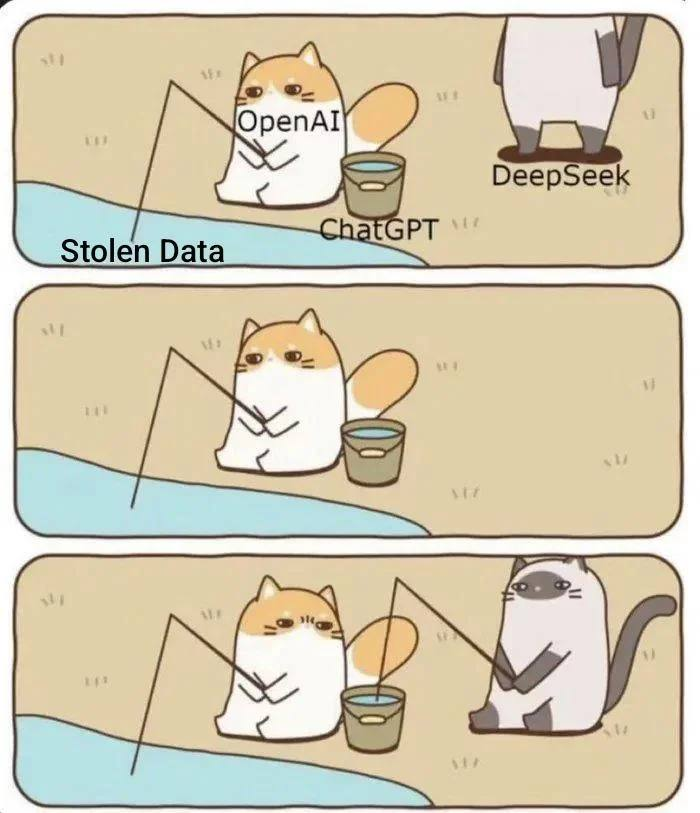

"Data просто хочет быть свободной..."

Источник: [тык](https://t.me/data_secrets/6048)